In [4]:
import pandas as pd
import numpy as np
from collections import defaultdict
import seaborn as sns
import matplotlib.pyplot as plt
from statistics import mean 
%matplotlib inline




In [6]:
## Collecting data

## curated data set on interactions in budding yeast SGD downloads
data_raw_interact=pd.read_excel(r'C:\Users\linigodelacruz\Documents\PhD_2018\Documentation\Calculations\data_sgd\interaction-filtered-data.xlsx',header=0,encoding="utf-8-sig")
##curated data on slim go terms in budding yeast SGD downloads
data_raw_slim_go=pd.read_excel(r'C:\Users\linigodelacruz\Documents\PhD_2018\Documentation\Calculations\data_sgd\slim-goterms-filtered-data.xlsx',header=0,encoding="utf-8-sig")

## published data from sgd from constanzo SGA 2010
data_int_score=pd.read_excel(r'C:\Users\linigodelacruz\Documents\PhD_2018\Documentation\Calculations\SGA-Boone-LAB\Costanzo2010-StringentCutoff.tab\genetic-interaction-score-dataset-constanzo.xlsx',header=4,encoding="utf-8-sig")

## published data in the cellmap.org 2016 
data_fitness_sga=pd.read_excel(r'C:\Users\linigodelacruz\Documents\PhD_2018\Documentation\Calculations\SGA-Boone-LAB\Data File S1. Raw genetic interaction datasets_ Pair-wise interaction format\Data-fitness.xlsx',header=0,sheet_name='NxN')

#essential genes in WT
annotated_essentials=pd.read_excel(r'C:\Users\linigodelacruz\Documents\PhD_2018\Documentation\Calculations\Esssential-genes-cerevisae\Essential-genes-yeast.xlsx',header=0,encoding="utf-8-sig")


In [56]:
## Changin columns names

data_raw_interact.columns=['Gene', 'Interactor', 'Assay', 'Annotation', 'Notes','Phenotype','Reference-SGD','citation']


data_raw_slim_go.columns=['Gene','gene-id','go-aspect','go-term','go-id','feature-type' ]

data_int_score.columns=['query-orf','query-name','array-orf','array-name','score','std','p-value']

data_fitness_sga.columns=['query-strain','query-allele-name','array-strain','array-allele-name','array-type','score','p-value',
                           'query-fitness','array-fitness','double-fitness','double-fitness-std']
annotated_essentials.columns=['Gene','Organism','Condition','Function']




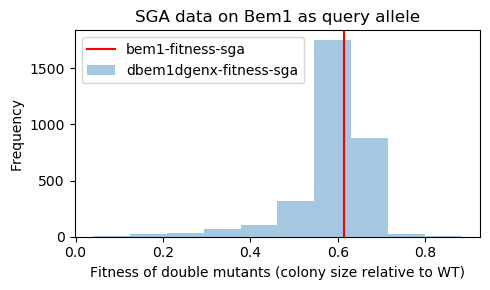

In [123]:
fig, axes = plt.subplots(1, 1, figsize=(5,3), dpi=100, sharex=True, sharey=True)
#plt.subplots_adjust(bottom=0.2, right=0.5, top=1.4)
#fig.suptitle('SGA data on Bem1 as query allele',x=0.5,y=1.05)


data_fitness_sga[data_fitness_sga['query-allele-name']=='bem1']['double-fitness'].plot(kind='hist',label='dbem1dgenx-fitness-sga',alpha=0.4)
# data_fitness_sga[data_fitness_sga['query-allele-name']=='bem1']['double-fitness-std'].plot(kind='hist',label='dbem1dgenx-fitness-sga-std')
bem1_data=data_fitness_sga[data_fitness_sga['query-allele-name']=='bem1']

plt.axvline(bem1_data['query-fitness'].tolist()[0],color='red',label='bem1-fitness-sga')
plt.legend()
plt.title('SGA data on Bem1 as query allele')
plt.xlabel('Fitness of double mutants (colony size relative to WT)')
# plt.plot(bem1_data['array-allele-name'][0:20],bem1_data['double-fitness'][0:20]),
# plt.plot(bem1_data['array-allele-name'][0:20],bem1_data['score'][0:20]),
plt.tight_layout()
plt.savefig('double-mutant-fitness-BEM1-query-SGA.png',format='png',dpi=300,transparent=True)

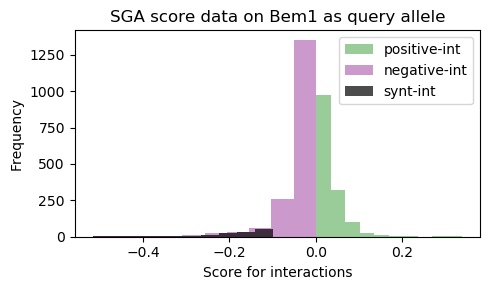

In [125]:
fig, axes = plt.subplots(1, 1, figsize=(5,3), dpi=100, sharex=True, sharey=True)
#plt.subplots_adjust(bottom=0.2, right=0.5, top=1.4)
#fig.suptitle('SGA data on Bem1 as query allele',x=0.5,y=1.05)


#data_fitness_sga[data_fitness_sga['query-allele-name']=='bem1']['score'].plot(kind='hist',label='dbem1dgenx-score-sga',alpha=0.4)
# data_fitness_sga[data_fitness_sga['query-allele-name']=='bem1']['double-fitness-std'].plot(kind='hist',label='dbem1dgenx-fitness-sga-std')
positive_score=data_fitness_sga[data_fitness_sga['query-allele-name']=='bem1']['score']>0
data_fitness_sga[data_fitness_sga['query-allele-name']=='bem1']['score'][positive_score[positive_score==True].index].plot(kind='hist',color='green', alpha=0.4,label='positive-int')

negative_score=data_fitness_sga[data_fitness_sga['query-allele-name']=='bem1']['score']<0
data_fitness_sga[data_fitness_sga['query-allele-name']=='bem1']['score'][negative_score[negative_score==True].index].plot(kind='hist',color='purple', alpha=0.4,label='negative-int')


negative_score=data_fitness_sga[data_fitness_sga['query-allele-name']=='bem1']['score']< -0.1
data_fitness_sga[data_fitness_sga['query-allele-name']=='bem1']['score'][negative_score[negative_score==True].index].plot(kind='hist',color='black', alpha=0.7,label='synt-int')

plt.legend()
plt.title('SGA score data on Bem1 as query allele')
plt.xlabel('Score for interactions')
plt.tight_layout()

plt.tight_layout()
plt.savefig('score-of-interactors-BEM1-query-SGA.png',format='png',dpi=300,transparent=True)